In [10]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from pydmd import DMD

In [11]:
stocks = ['Infy.NS','HDFCBANK.NS','HINDUNILVR.NS','MARUTI.NS','ASIANPAINT.NS',
"BAJFINANCE.NS","TATASTEEL.NS","CIPLA.NS","ICICIBANK.NS","RELIANCE.NS","ADANIPOWER.NS","TATAMOTORS.NS"]
#stocks=['Infy.NS','HDFCBANK.NS','HINDUNILVR.NS']

In [12]:
start_date = (datetime.datetime.now() - datetime.timedelta(days=365*5)).strftime("%m-%d-%Y")

In [13]:
start_date

'05-13-2017'

In [14]:
df=pd.DataFrame()

In [15]:
for stock in stocks:
    start_date = (datetime.datetime.now() - datetime.timedelta(days=365*5)).strftime("%m-%d-%Y")
    data = web.DataReader(stock, data_source='yahoo', start=start_date)
    df[stock]=data['Adj Close']

  

In [16]:
df.tail()

,Infy.NS,HDFCBANK.NS,HINDUNILVR.NS,MARUTI.NS,ASIANPAINT.NS,BAJFINANCE.NS,TATASTEEL.NS,CIPLA.NS,ICICIBANK.NS,RELIANCE.NS,ADANIPOWER.NS,TATAMOTORS.NS
Date,,,,,,,,,,,,
2022-05-05,1585.150024,1352.949951,2166.600098,7407.649902,3076.550049,6309.450195,1284.250000,948.400024,728.799988,2640.899902,278.149994,426.299988
2022-05-06,1542.849976,1317.599976,2149.199951,7279.250000,3016.250000,6000.299805,1283.699951,934.750000,719.250000,2620.649902,292.049988,408.549988
2022-05-09,1570.349976,1319.849976,2116.649902,7360.299805,3005.250000,6036.950195,1252.250000,938.299988,710.349976,2518.300049,281.600006,403.950012
2022-05-10,1553.000000,1341.050049,2180.399902,7515.899902,3086.350098,5928.450195,1164.900024,926.150024,711.299988,2474.649902,267.549988,391.750000
2022-05-11,1526.750000,1348.599976,2163.500000,7396.450195,3053.649902,5807.000000,1165.699951,937.599976,714.200012,2449.300049,255.300003,388.149994


In [17]:
data=df.to_numpy().T
data.shape

(12, 1234)

In [18]:
dmd = DMD(svd_rank=5050)
dmd.fit(data)

Eigenvalue (0.9247990451668613+0.019495267432444913j): distance from unit circle 0.14436666060619907
Eigenvalue (0.9247990451668613-0.019495267432444913j): distance from unit circle 0.14436666060619907
Eigenvalue (0.9661985882235512+0j): distance from unit circle 0.06646028811481652
Eigenvalue (0.9735953002731894+0.012445973986827221j): distance from unit circle 0.051957289017477315
Eigenvalue (0.9735953002731894-0.012445973986827221j): distance from unit circle 0.051957289017477315
Eigenvalue (0.9947032901211148+0.013195414235436985j): distance from unit circle 0.010391245665384519
Eigenvalue (0.9947032901211148-0.013195414235436985j): distance from unit circle 0.010391245665384519
Eigenvalue (1.0008863383384978+0j): distance from unit circle 0.0017734622726459648
Eigenvalue (0.9982978831702785+0j): distance from unit circle 0.0034013364577411
Eigenvalue (0.9926719028556202+0.00341232045332681j): distance from unit circle 0.01459084935012589
Eigenvalue (0.9926719028556202-0.0034123204

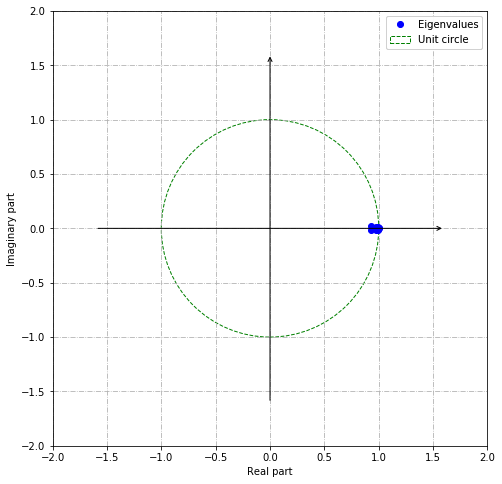

In [19]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))
dmd.plot_eigs(show_axes=True, show_unit_circle=True)

In [20]:
dmd.fit(data)
dmd.original_time['dt'] = dmd.dmd_time['dt'] = 1
dmd.original_time['t0'] = dmd.dmd_time['t0'] = 1
dmd.original_time['tend'] = dmd.dmd_time['tend'] = 1235

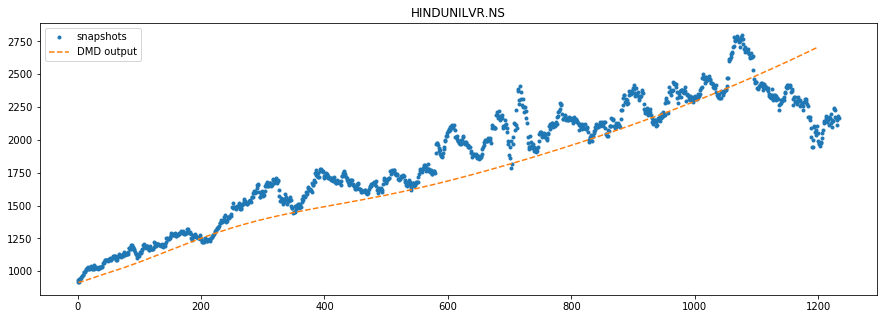

In [21]:
dmd.dmd_time['tend'] = 1200

fig = plt.figure(figsize=(15, 5))
plt.plot(data[2][:], '.', label='snapshots')
plt.plot(dmd.dmd_timesteps, dmd.reconstructed_data[2][:].real, '--', label='DMD output')
plt.legend()
plt.title(stocks[2])
plt.show()


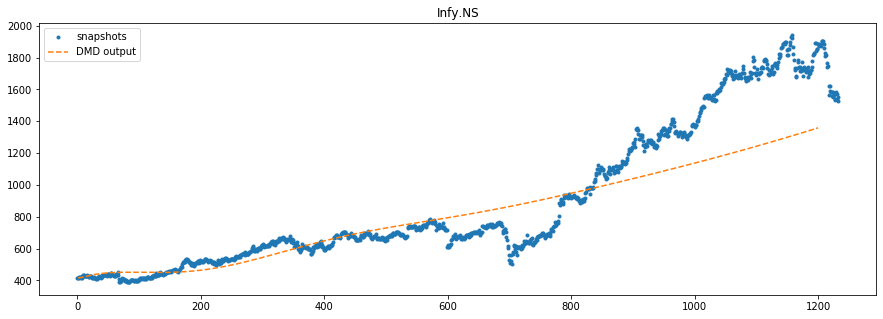

In [22]:
dmd.dmd_time['tend'] = 1200

fig = plt.figure(figsize=(15, 5))
plt.plot(data[0][:], '.', label='snapshots')
plt.plot(dmd.dmd_timesteps, dmd.reconstructed_data[0][:].real, '--', label='DMD output')
plt.legend()
plt.title(stocks[0])
plt.show()

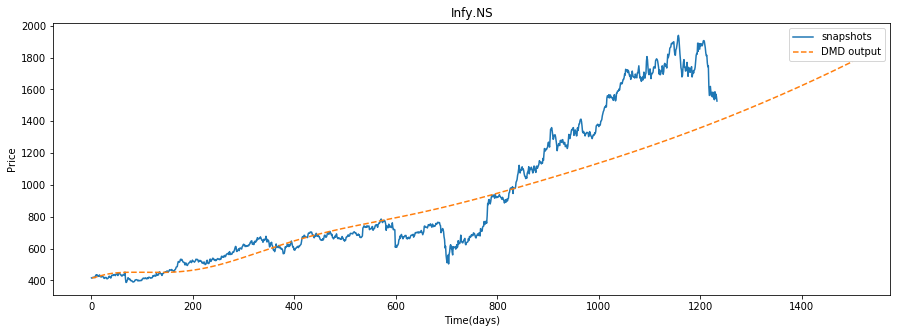

In [23]:
dmd.dmd_time['tend'] = 1500

fig = plt.figure(figsize=(15, 5))
plt.plot(data[0][:], label='snapshots')
plt.plot(dmd.dmd_timesteps, dmd.reconstructed_data[0][:].real, '--', label='DMD output')
plt.legend()
plt.title("Fitting DMD on data for "+stocks[0])
plt.xlabel("Time(days)")
plt.ylabel("Price")
plt.title(stocks[0])
plt.show()

In [24]:
def pred(x,w):
    dmd_p=DMD(svd_rank=10)
    x_hat=x.copy()
    for i in range(data.shape[1]-2*w+1):
        dmd_p.fit(x[:,i:i+w])
        dmd_p.dmd_time['tend'] = w+1
        x_hat[:,i+w]=dmd_p.reconstructed_data[:,-1]
    return (x_hat,x)

C:\Users\Sivamaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


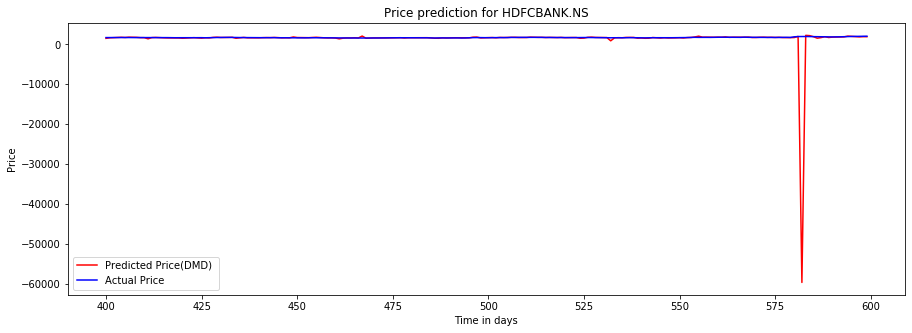

In [25]:
(x_hat,x)=pred(data,20)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(400,600),x_hat[2,400:600],color='red', label='Predicted Price(DMD) ')
plt.plot(range(400,600),(x[2,400:600]),color='blue', label='Actual Price')
plt.title("Price prediction for "+stocks[1])
plt.xlabel("Time in days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [27]:
import scipy as sc
from sklearn.metrics import mean_absolute_error

In [42]:
mape=np.abs(x-x_hat)/x
mape=np.nan_to_num(mape)
mape[1,20]

#ma=np.sum(mape,axis=1)/mape.shape[1]
#ma

0.014161941344246556

C:\Users\Sivamaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'HDFCBANK.NS')

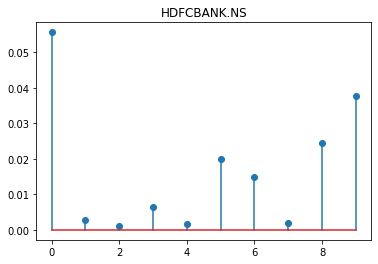

In [34]:
plt.stem(mape[1,450:460])
plt.title(stocks[1])

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
arima_pred=[]
for i in range(250,300):
    model=ARIMA(data[1,i:i+10],order=(1,1,0))
    model_fit=model.fit()
    forcast=model_fit.forecast(1)
    arima_pred.append(forcast)

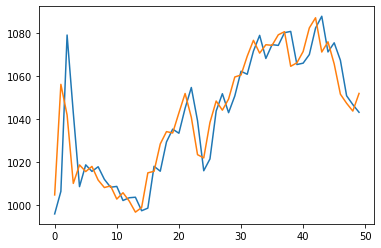

In [37]:
arima_pred=np.array(arima_pred)
plt.plot(arima_pred)
plt.plot(data[1,260:310])

In [41]:
m=np.abs(arima_pred-data[1,260:310])/data[1,260:310]
mape=np.nan_to_num(m)
mape[1,20]
#ma=np.sum(mape,axis=1)/mape.shape[1]
#ma

0.034966081144689576

C:\Users\Sivamaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


ValueError: zero-size array to reduction operation minimum which has no identity

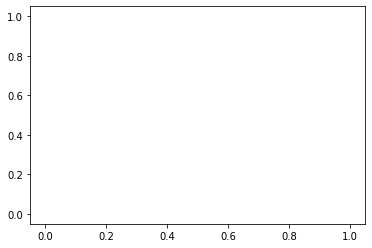

In [470]:
plt.stem(mape[1,260:310])
plt.title(stocks[1])

In [458]:
mape


array([[0.00427829, 0.04458722, 0.03152758, ..., 0.03657149, 0.03322235,
        0.04075368],
       [0.00878215, 0.05701218, 0.04412238, ..., 0.04910068, 0.04579511,
        0.05322849],
       [0.00166101, 0.04707715, 0.03405154, ..., 0.0390823 , 0.0357419 ,
        0.0432536 ],
       ...,
       [0.06227968, 0.01059197, 0.02440586, ..., 0.01907065, 0.02261321,
        0.01464691],
       [0.04586788, 0.00502127, 0.0085792 , ..., 0.00332641, 0.00681424,
        0.00102898],
       [0.04178338, 0.00890703, 0.00464033, ..., 0.00059194, 0.00288226,
        0.00493033]])

In [4]:
pip install pystan==2.19.1.1

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Sivamaran\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Sivamaran\\AppData\\Local\\Temp\\pip-install-r1ijd7ns\\fbprophet\\setup.py'"'"'; __file__='"'"'C:\\Users\\Sivamaran\\AppData\\Local\\Temp\\pip-install-r1ijd7ns\\fbprophet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Sivamaran\AppData\Local\Temp\pip-wheel-brjy5eyr'
       cwd: C:\Users\Sivamaran\AppData\Local\Temp\pip-install-r1ijd7ns\fbprophet\
  Complete output (46 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\Sivamaran\AppData\Local\Temp

  Using cached pandas-1.3.5-cp37-cp37m-win_amd64.whl (10.0 MB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.13-py3-none-any.whl (172 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Running setup.py clean for fbprophet
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730991 sha256=40a37542bd21d2d3d2b95e0ba77c8289fee7f445174f17f54db4fb13aaf3b6b7
  Stored in directory: c:\users\sivamaran\appdata\local\pip\cache\wheels\33\6b\a6\1d9dae2323750f635654952afc74aa8f2d982cded163f43895
Successfully built pymeeus
Failed to build fbprophet
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3



      self.distribution.run_command(command)
    File "C:\Users\Sivamaran\Anaconda3\lib\site-packages\setuptools\_distutils\dist.py", line 986, in run_command
      cmd_obj.run()
    File "C:\Users\Sivamaran\Anaconda3\lib\site-packages\setuptools\_distutils\command\build.py", line 135, in run
      self.run_command(cmd_name)
    File "C:\Users\Sivamaran\Anaconda3\lib\site-packages\setuptools\_distutils\cmd.py", line 313, in run_command
      self.distribution.run_command(command)
    File "C:\Users\Sivamaran\Anaconda3\lib\site-packages\setuptools\_distutils\dist.py", line 986, in run_command
      cmd_obj.run()
    File "C:\Users\Sivamaran\AppData\Local\Temp\pip-install-r1ijd7ns\fbprophet\setup.py", line 48, in run
      build_models(target_dir)
    File "C:\Users\Sivamaran\AppData\Local\Temp\pip-install-r1ijd7ns\fbprophet\setup.py", line 36, in build_models
      from fbprophet.models import StanBackendEnum
    File "C:\Users\Sivamaran\AppData\Local\Temp\pip-install-r1ijd7ns\fbprophe

In [7]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'